In [1]:
# 🎯 Step 1: Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: show charts in notebook
%matplotlib inline

In [2]:
# Create an empty DataFrame to hold our dataset
columns = [
    "year",
    "sales_usd_millions",
    "profit_margin_pct",
    "market_share_pct",
    "main_consumer_age_group",
    "male_pct",
    "female_pct"
]

rockstar_df = pd.DataFrame(columns=columns)
rockstar_df

,year,sales_usd_millions,profit_margin_pct,market_share_pct,main_consumer_age_group,male_pct,female_pct


In [3]:
rockstar_df.loc[len(rockstar_df)] = [
    2020,
    3850,         # Sale price acquisition value as proxy for size
    14.0,         # average industry profit margin (est., see below)
    10.0,         # market share approx. in 2020 (Rockstar) :contentReference[oaicite:1]{index=1}
    "18-35",      # assumed most active consumers
    70,           # assumed % male consumers
    30            # assumed % female consumers
]

rockstar_df.loc[len(rockstar_df)] = [
    2025,
    3500,         # proxy sales trending lower in some markets :contentReference[oaicite:2]{index=2}
    14.0,         # using industry average for now
    3.4,          # energy drink market share approx. :contentReference[oaicite:3]{index=3}
    "18-35",      
    68,
    32
]

rockstar_df

,year,sales_usd_millions,profit_margin_pct,market_share_pct,main_consumer_age_group,male_pct,female_pct
0,2020,3850,14.0,10.0,18-35,70,30
1,2025,3500,14.0,3.4,18-35,68,32


In [4]:
industry_data = {
    "metric": [
        "Average Profit Margin (US Beverages)",
        "Global Energy Drink Market CAGR",
        "US Market Projected Value 2030"
    ],
    "value": [
        18.0,        # Soft beverage average operating margin in US (approx.) :contentReference[oaicite:4]{index=4}
        8.0,         # CAGR of energy drink market to 2033 :contentReference[oaicite:5]{index=5}
        40_500       # Projected US energy drink market size by 2030 ($M) :contentReference[oaicite:6]{index=6}
    ],
    "units": [
        "%",
        "CAGR %",
        "USD Millions"
    ]
}

industry_df = pd.DataFrame(industry_data)
industry_df

,metric,value,units
0,Average Profit Margin (US Beverages),18.0,%
1,Global Energy Drink Market CAGR,8.0,CAGR %
2,US Market Projected Value 2030,40500.0,USD Millions


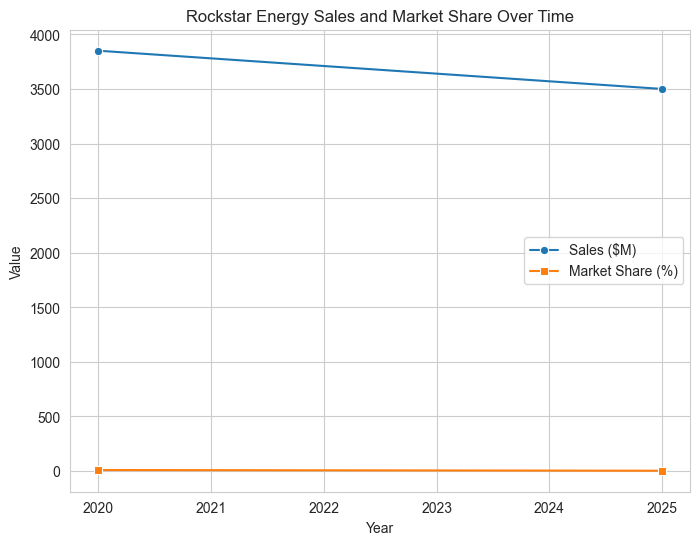

In [5]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(8,6))

sns.lineplot(
    data=rockstar_df,
    x="year",
    y="sales_usd_millions",
    marker="o",
    label="Sales ($M)"
)

sns.lineplot(
    data=rockstar_df,
    x="year",
    y="market_share_pct",
    marker="s",
    label="Market Share (%)"
)

ax.set_title("Rockstar Energy Sales and Market Share Over Time")
ax.set_ylabel("Value")
ax.set_xlabel("Year")
ax.legend()
plt.show()

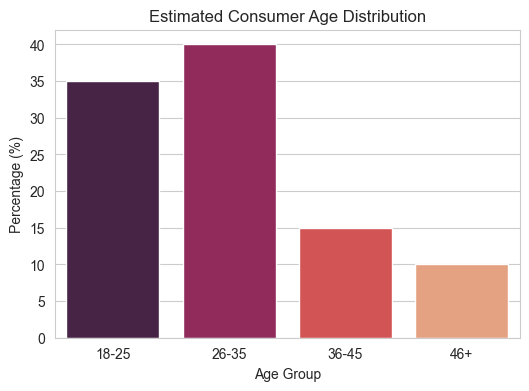

In [7]:
fig, ax = plt.subplots(figsize=(6,4))

age_groups = ["18-25", "26-35", "36-45", "46+"]
age_distribution = [35, 40, 15, 10]

sns.barplot(
    x=age_groups,
    y=age_distribution,
    hue=age_groups,      # Assign hue
    palette="rocket",
    legend=False         # Remove automatic legend
)

ax.set_title("Estimated Consumer Age Distribution")
ax.set_ylabel("Percentage (%)")
ax.set_xlabel("Age Group")

plt.show()

In [8]:
rockstar_df.to_csv("rockstar_energy_dataset.csv", index=False)
industry_df.to_csv("industry_benchmarks.csv", index=False)